<a href="https://colab.research.google.com/github/rgantonio/danknight_webnotes/blob/main/IANS_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In a Nutshell: Linear Regression: 



Linear regression is nothing more than a curve fitting model. Simple linear regression assumes that a data set can be modelled using a simple line. That means for a given data set, we estimate the trend to be in the form of:

$$ y =\beta_0 + \beta_1 x $$

Let's take a simple example. First let's import some simple packages.

In [2]:
####################################
# Importing packages for simulation
####################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's say we have an array for different y values and x values. Our goal is to determine the coefficients $\beta_0$ and $\beta_1$ that creates a line that best fits the data set.

In [12]:
####################################
# X and y data
####################################
x = np.array([ 0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 24, 25, 26, 28, 31, 33, 34, 35, 36, 38, 39])
y = np.array([-65,  35, 132,  90,  82, 116,  48, 172, 221, 166, 147, 127, 150, 294, 192, 289, 237, 329, 360, 256, 355, 342, 457, 317, 290, 391, 437, 513])

Let's take a quick look at the plot.

Text(0.5, 0, 'x')

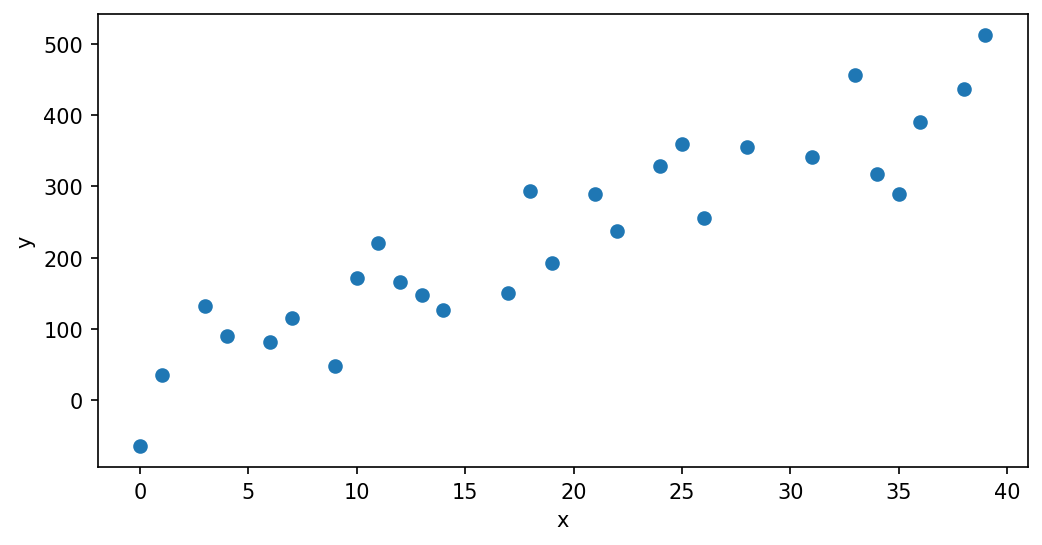

In [34]:
####################################
# Initial plot
####################################
fig = plt.figure(figsize=(8,4),dpi=150)
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')

At a glance there could be a reliable trend. The question is, what is the best linear equation that can represent the trend. We could do trial and error guesses because it's just a simple linear trend. But can we do something to systematically calculate the coefficients? Answer is **YES**.

# Residual Sum of Squares (RSS)



These problems are optimization problems. Basically, our goal is to find a linear equation:

$$ \hat{y} = \beta_0 + \beta_1 x $$

 Such that the error difference between our model (i.e., the line equation) and the actual data points is minimized! Essentially, we have a minimization problem. We write $\hat{y}$ to indicate that this is the predicted values based on the linear equation. We let $y$ be the actual data set values.

There are several ways to quantify errors. For example, we can get the actual error difference:

$$e = \hat{y} - y $$

Or the absolute difference:

$$|e| = |\hat{y} - y| $$

But the most popular one is the residual sum of square errors (RSS). RSS is essentially:

$$ RSS = e_1^2 + e_2^2 + e_3^2 + ... + e_n^2 $$

Where the subscripts pertain to the data point. Let's focus on RSS. Our minimization problem is essentially to pick the coeffcients $\beta_0$ and $\beta_1$ such that it minimizes the RSS. Expanding the equation results in:

$$ \min RSS = \left(y_1 - (\beta_0 + \beta_1 x_1) \right)^2 + \left(y_1 - (\beta_0 + \beta_1 x_1) \right)^2 + \left(y_1 - (\beta_0 + \beta_1 x_1) \right)^2...$$

Compressing it results in:

$$ \min RSS = \sum_{i=1}^n \left(y_i - (\beta_0 + \beta_1 x_i) \right)^2$$

If you recall from calculus, minimization or maximization means we get the partial derivative of $\beta_0$ and $\beta_1$ of RSS and equate it to 0. We would have:

$$\frac{\partial RSS}{\partial \beta_0} = -2 \sum \left( y_i - (\beta_0 + \beta_1 x_i)\right)$$

$$\frac{\partial RSS}{\partial \beta_1} = -2 \sum \left( y_i - (\beta_0 + \beta_1 x_i)\right)(x_i)$$

Do some research on the math but $\beta_0$ and $\beta_1$ is deterministic from these two working equations since we have 2 unknowns and 2 equations. You should arrive at:

$$\beta_0 = \mu_y - \beta_1 \mu_x $$

$$\beta_1 =  \frac{\sum(x_i - \mu_x)(y_i - \mu_y)}{\sum(x_i-\mu_x)^2} $$

Let's try it out. First let's check the means of $x$ and $y$.

In [17]:
####################################
# Calculating terms
####################################
mean_x = x.mean()
mean_y = y.mean()

print("Mean of x: %f" % mean_x)
print("Mean of y: %f" % mean_y)

Mean of x: 19.142857
Mean of y: 231.428571


Let's calculate $\beta_1$:

In [18]:
####################################
# Calculating beta_1
####################################

# Numerator part
num_part = 0

for i in range(len(x)):
  num_part += (x[i]-mean_x)*(y[i]-mean_y)

# Denominator part
den_part = 0

for i in range(len(x)):
  den_part += (x[i]-mean_x)**2

beta_1 = num_part/den_part

print("Beta_1 is: %f" % beta_1)

Beta_1 is: 10.701175


Let's calculate $\beta_0$:

In [19]:
####################################
# Calculating beta_0
####################################
beta_0 = mean_y - beta_1*mean_x

print("Beta_0 is: %f" % beta_0)

Beta_0 is: 26.577499


Since we have:

$$\beta_0 = 26.58 $$
$$\beta_1 = 10.70 $$

Our working equation would be:

$$ \hat{y} = 26.58 + 10.70 x $$

Let's try to predict values and compare it to the earlier values:

In [22]:
####################################
# Predicting values
####################################
y_pred = beta_0 + beta_1*x

print(y_pred)
print(y)

[ 26.57749872  37.27867416  58.68102504  69.38220048  90.78455136
 101.4857268  122.88807768 133.58925312 144.29042856 154.991604
 165.69277944 176.39395488 208.4974812  219.19865664 229.89983208
 251.30218296 262.0033584  283.40570928 294.10688472 304.80806016
 326.21041104 358.31393736 379.71628824 390.41746368 401.11863912
 411.81981456 433.22216544 443.92334088]
[-65  35 132  90  82 116  48 172 221 166 147 127 150 294 192 289 237 329
 360 256 355 342 457 317 290 391 437 513]


At a glance the data does not look perfect but if we plot the linear equation we should see a nice trend.

Text(0.5, 0, 'x')

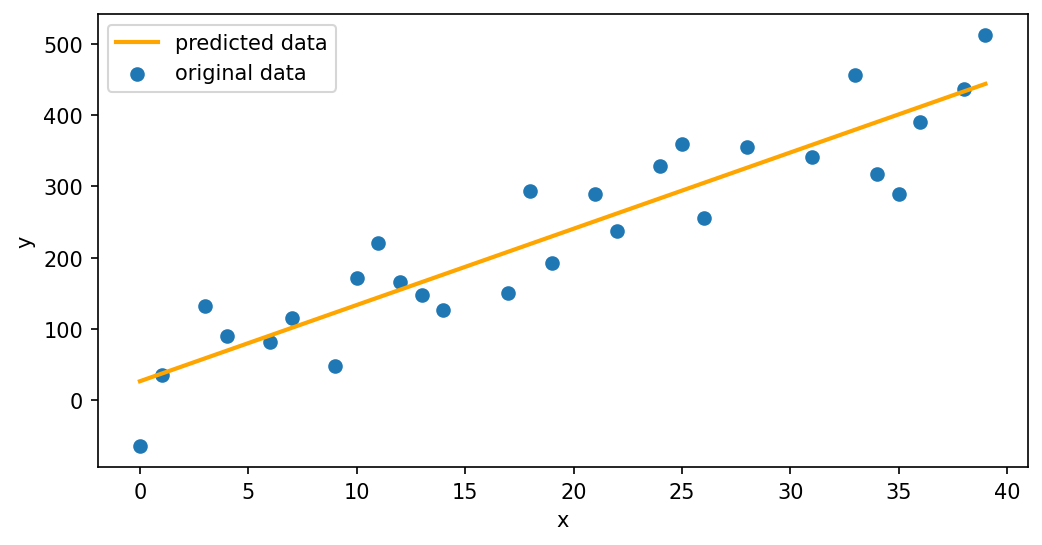

In [33]:
####################################
# Comparison plot
####################################

fig = plt.figure(figsize=(8,4),dpi=150)
plt.scatter(x,y)
plt.plot(x,y_pred,color='orange',lw=2)
plt.legend(['predicted data','original data'])
plt.ylabel('y')
plt.xlabel('x')


# Multivariate Linear Regression



What we have just introduced is the essence of linear regression. It's just a curve fitting function! Our example only handles a single feature, but in practice we should be able to handle multiple ones. In general, a linear regerssion predictive model is in the form of:

$$ \hat{y} = \sum_{i=1}^n \beta_i x_i $$

It is essentially a linear combination. Our goal is still the same, what are the appropriate $\beta_i$ coefficients?

Unforunately, solving for $\beta_i$ is not as straightforward as what we have demonstrated. It is possible to generate hand calculations but that is a gruesome way to approach it. Instead, we can use computers to help us.

We'll borrow the idea from what we have learned. Essentially, we have:

1. Write down the working model.
2. Write a cost function. In our case it was the RSS.
3. Do optimization to minimize RSS and find the appropriate $\beta_i$.

Simple right? For a multivariate linear regression, we still use the RSS cost function but it's in the form of:

$$J(\beta) = \frac{1}{2m} \sum_{j=1}^m \left(y^j-\sum_{i=0}^n \beta_ix_i^j \right)^2 $$

Take note that the $j$ terms here pertains to the entry number while the $i$ terms pertains to the maltivariable term. Our goal is to minimize the cost function $J(\beta)$. We also do a partial derivative on each $\beta_i$ term. The partial derivative for each term is called the gradient descent:

$$ \nabla J = \begin{bmatrix}
 \frac{\partial J}{\partial \beta_0 } \\ 
 \frac{\partial J}{\partial \beta_1 } \\
 \frac{\partial J}{\partial \beta_2 } \\
 ... \\
 \frac{\partial J}{\partial \beta_n }\\
\end{bmatrix} $$

Then each term would have the form:

$$\frac{\partial J}{\partial \beta_k } = -\frac{1}{m} \sum_{j=1}^m \left( y^j - \sum_{i=0}^n \beta_i x_i^j \right)x_k^j$$

This is the working equation. Previously, we took the derivative and equate it to zero to find the optimal $beta$ coefficients. Here, the gradient descent function is that same derivative term but this time, we find the $beta$ terms and update it for every step. For each $j$ iteration, we allow the machine to calculate the next step until we reach a local minimum. This is the numerical method of what we just did earlier! You might ask, how do we update $\beta_k$ then? Well:

$$\beta_0 := \beta_0 - \alpha \left( \frac{1}{m} \sum_{j=1}^m \left( y^j - \sum_{i=0}^n \beta_i x_i^j \right)x_k^j\right) $$

$$\beta_1 := \beta_1 - \alpha \left( \frac{1}{m} \sum_{j=1}^m \left( y^j - \sum_{i=0}^n \beta_i x_i^j \right)x_k^j\right) $$

$$... $$

$$\beta_n := \beta_n - \alpha \left( \frac{1}{m} \sum_{j=1}^m \left( y^j - \sum_{i=0}^n \beta_i x_i^j \right)x_k^j\right) $$

The $\alpha$ term here is a learning rate. The learning rate tells us how "heavy" each step should be. The iterations can last up to infinity but there are two cases where we stop the gradient descent: (1) we reach the maximum desired iterations and (2) we reach the desired tolerable error. This completes the entire algorithm. We'll explore this next time :)

# Polynomial Regression



Sometimes some some features may have a synergistic effect. For example, $x_1$ and $x_2$ combined may have a very nice contribution to the overall trend. That is, instead of just looking solely at feature $x_1$ and $x_2$ separately, we may be interested in $x_1\cdot x_2$ combination! This are, of course, hidden in the data set which may not be seen immediately. We know these to be non-linear effects but that shouldn't stop us from doing good linear regression.

In this way, let's say we are interested in the combination of $x_1$ and $x_2$ features, instead of restricting ourselves to a linear regression:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

We can create a **polynomial regression** which captures non-linear effects better. However, in polynomial regression we apply multiple permutations! For example:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1x_2 $$

Observe that we placed all combinations even starting from the isolated linear components (i.e., $\beta_1 x_1$). This is the essence of polynomial regression. How do we find the optimal $\beta_i$ coefficients? We just use the gradient descent method.

# Metrics for Performance



Of course, just like any system, we need metrics of performance to measure how good our model (or design) is. Linear (or polynomial) regression problems are used for predicting values. That is how close is our model to the actual data. The outputs are meant for predictions and not categories. That means, the outputs or the model measures real numbers.

For linear regression models we have the following metrics:

1. **Mean absolute error (MAE)**:

$$ P = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

2. **Mean squared error (MSE)**:

$$ P = \frac{1}{n} \sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2$$

3. **Root mean squared error (RMSE)**:

$$ P = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2}$$

These metrics are important for evaluating how good our linear regression model is.

# Regularization

Regularization is the method used for feature selection or reduction of overfitting. The term **overfitting** occurs when a model hits all the trained data perfectly. However, when we start testing it to unseen data, it performs poorly. We say that the model is overfitted to the trained data if this happens. To reduce overfitting we apply regularization. Regularization is like extra tuning for the cost function. What it basically does is to "lessen" the effects of overfitting based on the $\beta_i$ parameters. You may need to research or review this even deeper. There are three types of regularization methods for linear regression:

1. **L1 Regularization: Lasso Regression **

$$ J = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_j \right)^2 + \lambda \sum_{j=1}^p |B_j| $$

Lasso regression is a simple absolute value tuning parameter with some $\lambda$ hyperparameter. What it does is to suppress drastic changes in the trained $\beta_i$ parameters. The advantage of lasso regression is that it can prune out features that it computes to be "useless". For example, sometimes a feature my not really have any significant information to the prediction.

2. **L2 Regularization: Ridge Regression **

$$ J = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_j \right)^2 + \lambda \sum_{j=1}^p B_j^2 $$

Ridge regression is a squared hyperparameter. The only difference with lasso is that this time, in ridge regression, the larger errors are penalized greatly. In otherwords, because of that square relationship, for every large cost, it is also greatly penalized. The only cons for this is that it cannot prune features. It is possible that the $\beta_i$ can be close to 0. You might need to investigate the model further if this happens.

3. **Combination of L1 and L2 Regression: Elastic Net**

$$ J =  \frac{1}{2n} \sum_{i=1}^n \left(y_i - x_i^j\beta_j \right)^2 + \lambda \left(\frac{1-\alpha}{2}\sum_{j=1}^m \beta_j^2 + \alpha \sum_{j=1}^m |\beta_j| \right)$$

The elastic net regression combines both the lasso and ridge regression into one. The only trick though is that we specifiy the $\alpha$ pamater as the weighting on how much lasso or how much ridge do we want. This provides a more sophisticated model but also combines both benefits of L1 and L2 regressions.